<a href="https://colab.research.google.com/github/agustinparada/Fisica_Computacional_I/blob/master/Actividad4/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Actividad 4***
Realizado por: José Agustín Parada Peralta. Para la materia de Física Computacional I en la Universidad de Sonora.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# ***Elaboración del dataframe***
Se lleva a cabo la construcción de la estructura de los datos climatológicos de la Ciudad Lerdo, en el estado de Durango.

In [25]:
# Definimos la URL del archivo con los datos desde una página web, al igual que le asignamos los parámetros necesarios para su correcta lectura.
# También definimos el nombre de las columnas del dataframe.
url = 'https://raw.githubusercontent.com/agustinparada/Fisica_Computacional_I/master/Actividad1/10163.txt'
cols=['fecha', 'precip (mm)', 'evap (mm)', 'Tmax (°C)', 'Tmin (°C)']
df=pd.read_csv(url,names=cols,encoding='cp1251',skiprows=19,skipfooter=1,sep='\s+',header=None, engine='python')

# Creamos una copia de nuestra estructura de datos original para que, en caso de así requerirlo, poder ser capaces de tener un respaldo de los datos originales.
# Y procedemos a trabajar con la copia de los datos.
df_copi=df.copy()

# Reemplazaremos los valores string 'Nulo' presentes en el dataframe para reemplazarlos por vacíos.
# Asignamos a una nueva copia la estructura de los datos con los valores reemplazados.
valor='Nulo'
df_copi2=df_copi.replace(to_replace=valor, value='', regex=True)

# Convertimos los datos presentes en las columnas a lo que son, datos numéricos flotantes.
cols=['precip (mm)', 'evap (mm)', 'Tmax (°C)', 'Tmin (°C)']
for c in cols:
  df_copi2[c]=pd.to_numeric(df_copi2[c],errors='coerce')

# Creamos una copia nueva, de respaldo.
df_cop=df_copi2.copy()

# Ahora hagamos que detecte que el primer dato de fecha es el día.
df_cop['fecha']=pd.to_datetime(df_cop['fecha'],dayfirst=True).copy()

# Creamos dos columnas nuevas con los años y los meses (variables enteras).
df_cop['Año']=df_cop['fecha'].dt.year
df_cop['Mes']=df_cop['fecha'].dt.month
df_meteo=df_cop.copy()
df_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9935 entries, 0 to 9934
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   fecha        9935 non-null   datetime64[ns]
 1   precip (mm)  9922 non-null   float64       
 2   evap (mm)    8357 non-null   float64       
 3   Tmax (°C)    9756 non-null   float64       
 4   Tmin (°C)    9758 non-null   float64       
 5   Año          9935 non-null   int64         
 6   Mes          9935 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 543.4 KB


# ***Histogramas y gráficas KDE***
Se llevan a cabo gráficas de las distribuciones de las variables a analizar, tales como Precipitación, Evaporación, Temperaturas Mínima y Máxima, etcétera.

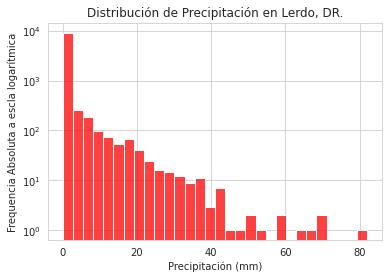

In [26]:
# HISTOGRAMA DE PRECIPITACIÓN
sb.set_style('whitegrid')

#Creación de gráfico
sb.histplot(data=df_meteo, x='precip (mm)', bins=30, color='r', log_scale=(False,True))

plt.xlabel('Precipitación (mm)') 
plt.ylabel('Frequencia Absoluta a escla logarítmica') 
plt.title('Distribución de Precipitación en Lerdo, DR.') 
plt.show()

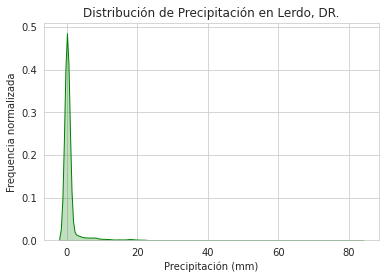

In [27]:
# HISTOGRAMA DE PRECIPITACIÓN 
sb.set_style('whitegrid')

#Creación de gráfico
sb.kdeplot(data=df_meteo['precip (mm)'], color='g', fill=True)

plt.xlabel('Precipitación (mm)') 
plt.ylabel('Frequencia normalizada') 
plt.title('Distribución de Precipitación en Lerdo, DR.') 
plt.show()

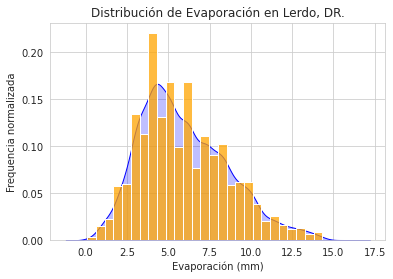

In [28]:
# HISTOGRAMA DE EVAPORACIÓN
sb.set_style('whitegrid')

#Creación de gráficos
sb.histplot(data=df_meteo, x='evap (mm)',stat='density', bins=30, color='orange')
sb.kdeplot(data=df_meteo['evap (mm)'], color='blue', fill=True)

plt.xlabel('Evaporación (mm)') 
plt.ylabel('Frequencia normalizada') 
plt.title('Distribución de Evaporación en Lerdo, DR.') 
plt.show()

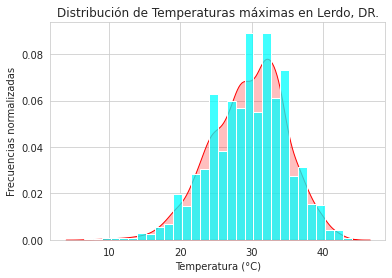

In [29]:
# TEMPERATURAS MÁXIMAS

sb.set_style('whitegrid')
#Tmed=df_meteo['Tmax (°C)'].median()    Calcula la mediana de los datos especificados
#Tprom=df_meteo['Tmax (°C)'].mean()     Calcula la media de los datos especificados

#Creación de gráficos
sb.histplot(data=df_meteo, x='Tmax (°C)', stat='density', bins=30, color='cyan')
sb.kdeplot(data=df_meteo['Tmax (°C)'], color='r', fill=True)
#plt.axvline(x=Tmed, color='r', label='med')    línea vertical representando la mediana
#plt.axvline(x=Tprom, color='g', label='prom')  línea vertical representando la media

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencias normalizadas')
plt.title('Distribución de Temperaturas máximas en Lerdo, DR.')
plt.show()

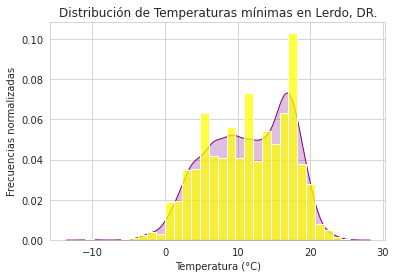

In [30]:
# TEMPERATURAS MÍNIMAS
sb.set_style('whitegrid')
#Creación de gráficos
sb.histplot(data=df_meteo, x='Tmin (°C)', bins=30, stat='density', color='yellow')
sb.kdeplot(df_meteo['Tmin (°C)'], fill=True, color='purple')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencias normalizadas')
plt.title('Distribución de Temperaturas mínimas en Lerdo, DR.')
plt.show()

# ***Gráficas de cajas***
Se efectuaron gráficaos de cajas para el análisis de la distribución de las variables climatológicas.

[Text(0.5, 0, 'Evaporación (mm)'),
 Text(0.5, 1.0, 'Distribución de la evaporación en la Cd. Lerdo, DR.')]

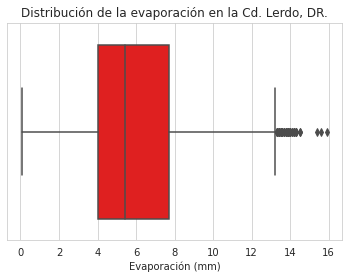

In [31]:
# Gráfica de cajas para la evaporación
sb.set_style('whitegrid')
#Creación de gráfico
sb.boxplot(x=df_meteo['evap (mm)'],data=df_meteo,orient='h',color='r').set(xlabel='Evaporación (mm)', title='Distribución de la evaporación en la Cd. Lerdo, DR.')

[Text(0.5, 0, 'Temperaturas (°C)'),
 Text(0.5, 1.0, 'Temperatura máxima en Lerdo, Durango')]

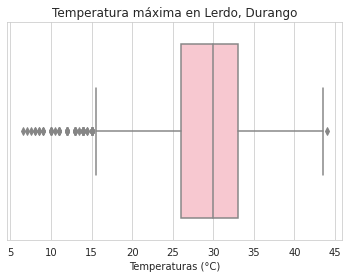

In [32]:
# Gráficas de cajas de temperaturas máximas
sb.set_style('whitegrid')

#Creación de gráfico
sb.boxplot(x=df_meteo['Tmax (°C)'], data=df_meteo, orient='h', color='pink').set(xlabel='Temperaturas (°C)',title='Temperatura máxima en Lerdo, Durango')

[Text(0.5, 0, 'Temperaturas (°C)'),
 Text(0.5, 1.0, 'Temperatura mínima en Lerdo, Durango')]

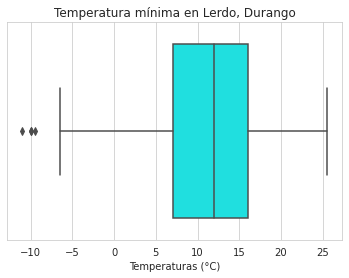

In [33]:
# Gráfica de cajas para temperaturas mínimas
sb.set_style('whitegrid')

#Creación de gráfico
sb.boxplot(x=df_meteo['Tmin (°C)'], data=df_meteo, orient='h', color='cyan').set(xlabel='Temperaturas (°C)', title='Temperatura mínima en Lerdo, Durango')

# ***Gráficos de barras***
Los siguientes son representaciones gráficas de barras con líneas de error del comportamiento de precipitaciones respecto de los años de operación de la estación, y respecto de los meses de los años.

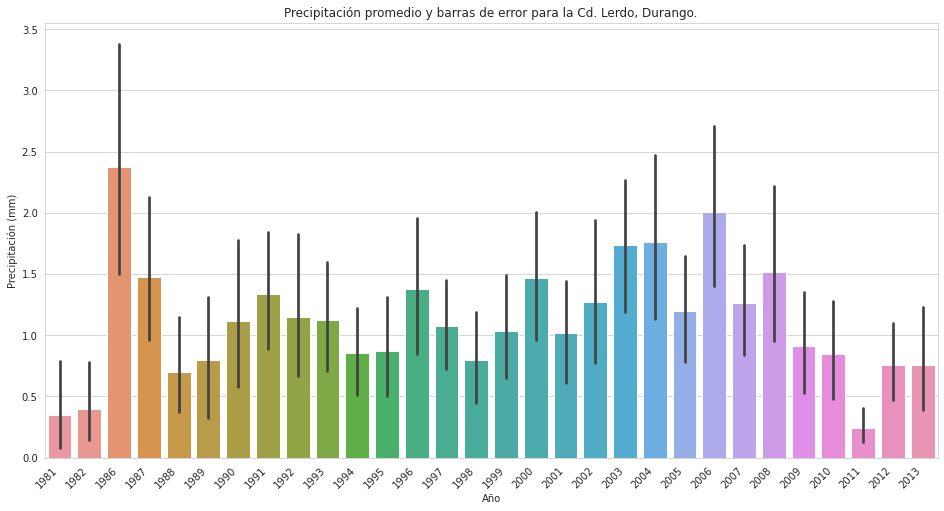

In [34]:
# Gráfica de las precipitaciones del periodo comprendido entre 1984 y 2013.
sb.set_style('whitegrid')

#Creación y configuración del gráfico
plt.figure(figsize=(16,8))
g=sb.barplot(data=df_meteo, x='Año', y='precip (mm)')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel('Año')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación promedio y barras de error para la Cd. Lerdo, Durango.')
plt.show()

          fecha  precip (mm)  evap (mm)  Tmax (°C)  Tmin (°C)   Año  Mes
0    1981-09-01          0.0        5.9       31.5       15.5  1981  Sep
1    1981-09-02          0.0        5.9       31.5       15.5  1981  Sep
2    1981-09-03          0.0        5.9       31.5       15.5  1981  Sep
3    1981-09-04          0.0        5.9       31.5       15.5  1981  Sep
4    1981-09-05          0.0        5.9       31.5       15.5  1981  Sep
...         ...          ...        ...        ...        ...   ...  ...
9930 2013-12-27          0.0        NaN        9.0        5.0  2013  Dec
9931 2013-12-28          0.0        NaN       17.0        5.0  2013  Dec
9932 2013-12-29          0.0        NaN       21.0        4.0  2013  Dec
9933 2013-12-30          0.0        NaN       10.0        7.0  2013  Dec
9934 2013-12-31          0.0        NaN       21.0        3.0  2013  Dec

[9935 rows x 7 columns]


Text(0.5, 1.0, 'Precipitación promedio y barras de error por mes del año en Cd. Lerdo, Durango.')

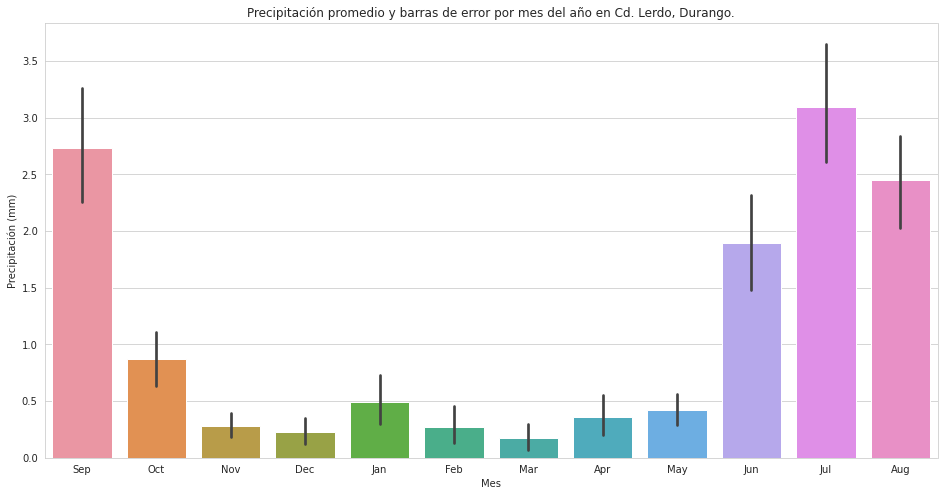

In [35]:
# Haremos la gráfica de barras ahora por mes.
# Primero convertimos cada número entero de los meses a caracteres.

# Reemplazamos los números de los meses a sus nombres srt.
df_meteo.drop('Mes', axis=1, inplace=True)
df_meteo['Mes']=df_meteo['fecha'].dt.strftime('%b')
print(df_meteo)

sb.set_style('whitegrid')

#Creación y configuración del gráfico
plt.figure(figsize=(16,8))
j=sb.barplot(data=df_meteo, x='Mes', y='precip (mm)')

plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación promedio y barras de error por mes del año en Cd. Lerdo, Durango.')

# ***Gráficas de líneas***
Se muestran a continuación, gráficos de líneas que ilustran la variabilidad de la precipitación, las temperaturas mínimas y máximas a lo largo de los últimos 30 años.

In [36]:
# Separaremos a los datos en grupos de 10 años.
df_30=df_meteo[(df_meteo['Año']>=1984)&(df_meteo['Año']<2014)]


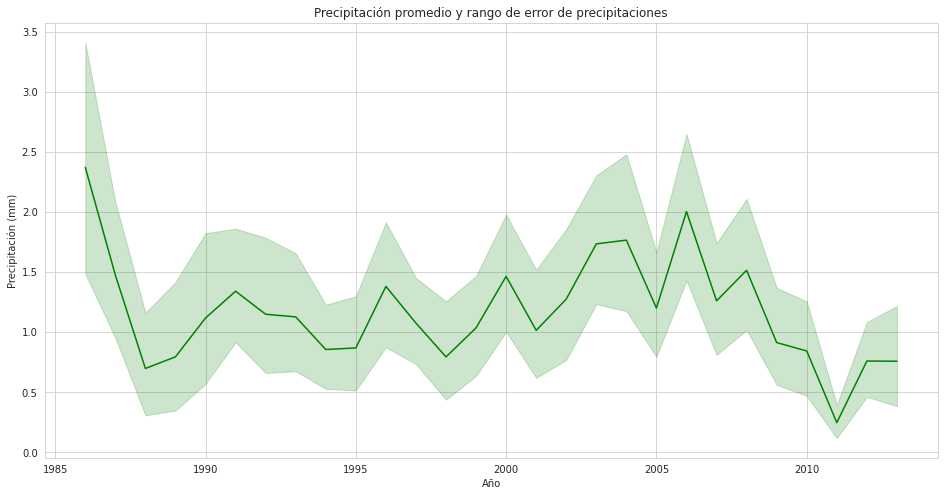

In [37]:
# Gráfica de líneas de precipitación
sb.set_style('whitegrid')

#Creación y configuración del gráfico
plt.figure(figsize=(16,8))
h=sb.lineplot(data=df_30, x='Año', y='precip (mm)', color='g')

plt.xlabel('Año')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación promedio y rango de error de precipitaciones')
plt.show()

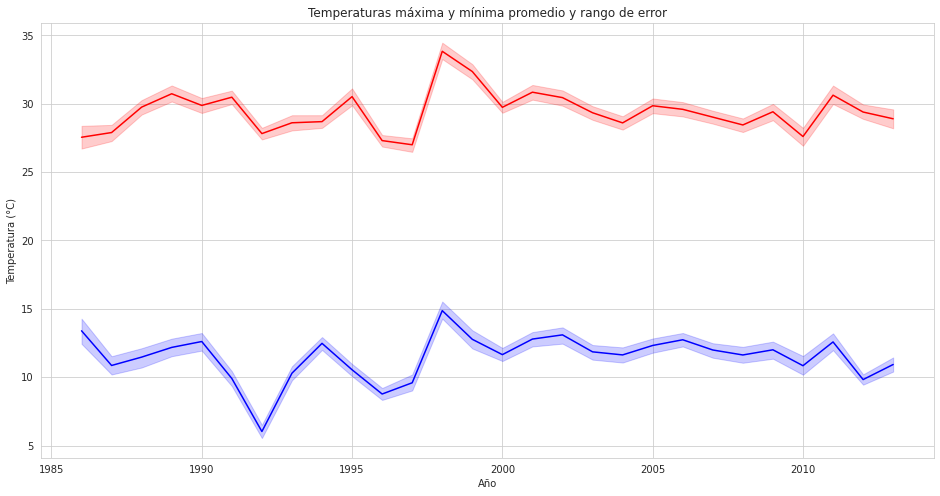

In [38]:
# Gráfica de líneas de las temperaturas máxima y mínima
sb.set_style('whitegrid')

#Creación y configuración del gráfico
plt.figure(figsize=(16,8))
sb.lineplot(data=df_30,x='Año',y='Tmax (°C)',color='r')
sb.lineplot(data=df_30,x='Año',y='Tmin (°C)',color='b')

plt.xlabel('Año')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas máxima y mínima promedio y rango de error')
plt.show()

# ***Gráficas de barras***
Se muestran a continuación, gráficos de barras que ilustran la variabilidad de la precipitación, las temperaturas mínimas y máximas a lo largo de los meses de los últimos 30 años.

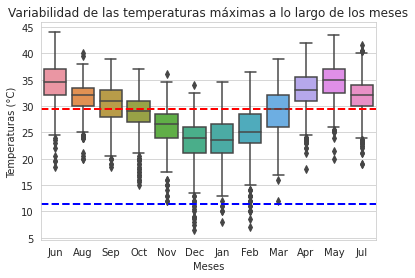

In [39]:
# Gráfica de cajas de variabilidad de Temperaturas máximas.
sb.set_style('whitegrid')
TMin=df_30['Tmin (°C)'].mean()
TMax=df_30['Tmax (°C)'].mean()

#Creación y configuración del gráfico
g=sb.boxplot(x='Mes', y='Tmax (°C)', data=df_30)
plt.axhline(TMin, color='b', linestyle='--', linewidth=2)
plt.axhline(TMax, color='r', linestyle='--', linewidth=2)

plt.xlabel('Meses')
plt.ylabel('Temperaturas (°C)')
plt.title('Variabilidad de las temperaturas máximas a lo largo de los meses')
plt.show()

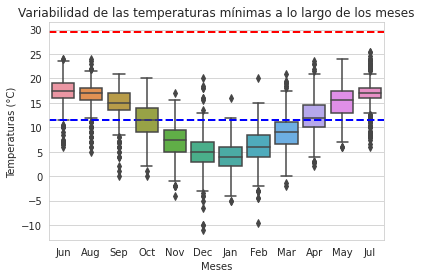

In [40]:
# Gráfica de cajas de variabilidad de Temperaturas mínimas.
sb.set_style('whitegrid')
TMin=df_30['Tmin (°C)'].mean()
TMax=df_30['Tmax (°C)'].mean()

#Creación y configuración del gráfico
g=sb.boxplot(x='Mes', y='Tmin (°C)', data=df_30)
plt.axhline(TMin, color='b', linestyle='--', linewidth=2)
plt.axhline(TMax, color='r', linestyle='--', linewidth=2)

plt.xlabel('Meses')
plt.ylabel('Temperaturas (°C)')
plt.title('Variabilidad de las temperaturas mínimas a lo largo de los meses')
plt.show()

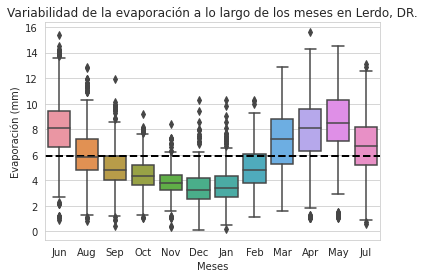

In [41]:
# Gráfica de cajas de evaporación.
sb.set_style('whitegrid')
EvMean=df_30['evap (mm)'].mean()

#Creación y configuración del gráfico
k=sb.boxplot(x='Mes', y='evap (mm)', data=df_30)
plt.axhline(EvMean, color='black', linestyle='--', linewidth=2)

plt.xlabel('Meses')
plt.ylabel('Evaporación (mm)')
plt.title('Variabilidad de la evaporación a lo largo de los meses en Lerdo, DR.')
plt.show()
